# Samuel Gartenstein QMSS GR5073 Homework 3

In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")


In [2]:
#Creating dataframe for red wine data
redwine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
redwine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Question 1

Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?




In [3]:
redwine_df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

The values for the wine quality fall between $3$ and $8$, and the average wine quality is $5.64$.

([<matplotlib.axis.XTick at 0x7f6289360040>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

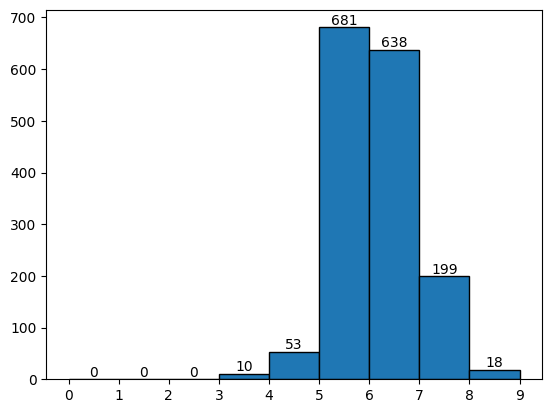

In [4]:
#Creating  histogram of the wine quality

bins=range(0,10,1)
counts, edges, bars = plt.hist(redwine_df[['quality']], bins, edgecolor='black')

plt.bar_label(bars) #Labelling the bars with the count of run number in each bin
plt.xticks(range(0,10,1))

The histogram above shows the distribution of the wine quality. The most represented wine quality ratings are 5 and 6, with both of them accounting for $82.49\%$ of the observations. Only $0.63\%$ and $1.13\%$ of wines are given the lowest and highest qualities respectively.

In [5]:
#Scaling X training and testing data using the StandardScaler function
scaler = StandardScaler()
scaler.fit(redwine_df)
rw_scaled = scaler.transform(redwine_df)
rw_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [6]:
rw_scaled = pd.DataFrame(rw_scaled, index=redwine_df.index, columns=redwine_df.columns)
rw_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### Elbow Curve Plot

Text(0.5, 1.0, 'Elbow Curve')

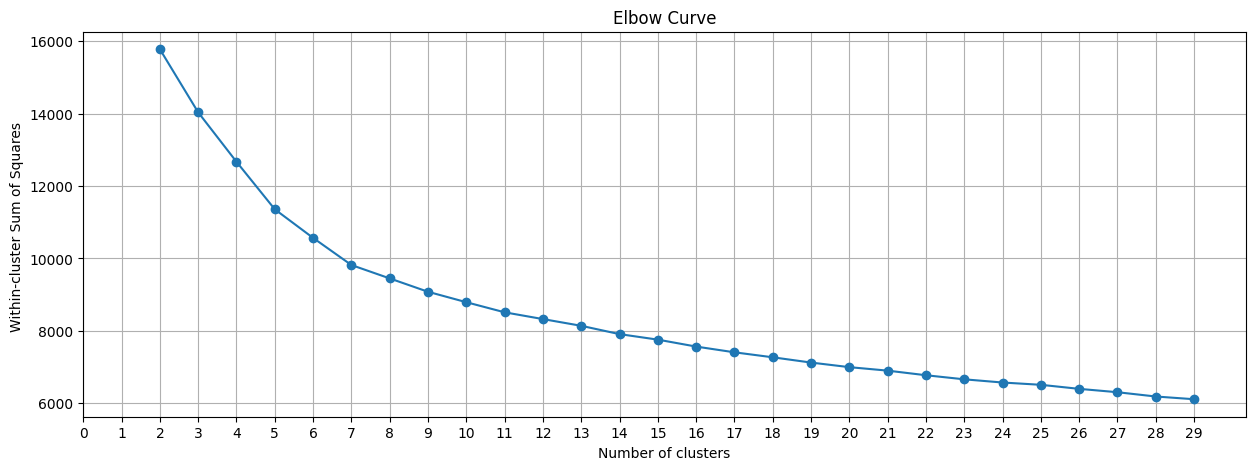

In [7]:
WCSS = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rw_scaled)
    WCSS.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 30), WCSS, marker='o')
plt.grid(True)
plt.xticks(range(0,30,1))
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares ')

plt.title('Elbow Curve')


Above is the Eblow Curve, which plots the Within-cluster Sum of Squares (WCSS) for each cluster. As we add more clusters to the wine dataframe, the WCSS decreases. However, the rate at which the WCSS decreases as we add more clusters is not constant. We need to find at which value of $k$ the magnitudes of the slopes have the largest difference. In other words, we need to find the $k$ at which the rate of $WCSS$ decrease substantially slows.

While differentiable calculus is one way to find such a point, each value of $k$ can also be viewed as a "cusp." As a result, we cannot use differentiation. Rather, we are going to have to heuristically determine where the slopes show the most significant difference, indicating a change in the rate of WCSS decrease. We need to find the largest value of


$|{\frac{WCSS_{k}-WCSS_{k-1}}{k-(k-1)}} - {\frac{WCSS_{k+1}-WCSS_{k}}{(k+1)-k}}|$

which simplifies to

$|2WCSS_{k}-WCSS_{k-1} - WCSS_{k+1}|$


In a classic elbow graph, it is easy to see which values of $WCSS$ at $k$ and $k+1$ have the largest average rate of change. However, identifying the elbow point in the wine data set is difficult, leading me to heuristically analyze the slopes and determine the rate at which the elbow plot is decreasing.

In [8]:


WCSS_df = pd.DataFrame(WCSS, columns=["WCSS"], index=range(2, 30))
WCSS_df['Slope'] = WCSS_df['WCSS'].diff()
WCSS_df['Difference in Slopes'] = WCSS_df['Slope'].diff()


WCSS_df.head(10)

,WCSS,Slope,Difference in Slopes
2,15779.428705,NaN,NaN
3,14035.528125,-1743.900579,NaN
4,12669.477769,-1366.050356,377.850223
5,11357.069312,-1312.408456,53.641900
6,10566.821277,-790.248036,522.160421
7,9817.503267,-749.318009,40.930027
8,9447.706627,-369.796641,379.521369
9,9078.664238,-369.042388,0.754252
10,8790.211625,-288.452613,80.589775
11,8511.199812,-279.011813,9.440800


As mentioned above, we want to find where the magnitude of the slope of the $WCSS$ starts to significantly decrease. This occurs at $k=5$. In the WCSS data frame, transitioning from $4$ to $5$ clusters results in a decrease of $-1312.41$ in WCSS, while moving from $5$ to $6$ clusters yields a decrease of $-790.25$. The absolute difference between the slopes when going from $4$ to $5$ and $5$ to $6$ is $522.16$, representing the largest change in slopes. Consequently, $5$ is identified as the optimal number of clusters to use for the red wine data (scaled).

In [9]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(rw_scaled)
y_pred = km.predict(rw_scaled)


In [10]:
km.predict(rw_scaled)

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

In [11]:
km.labels_

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

In [12]:
rw_scaled['cluster'] = km.labels_+1
rw_scaled.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,4
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,4
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,4
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,5
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,4
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823,4
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823,4
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519,4
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519,4
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823,1


### Creating Plots

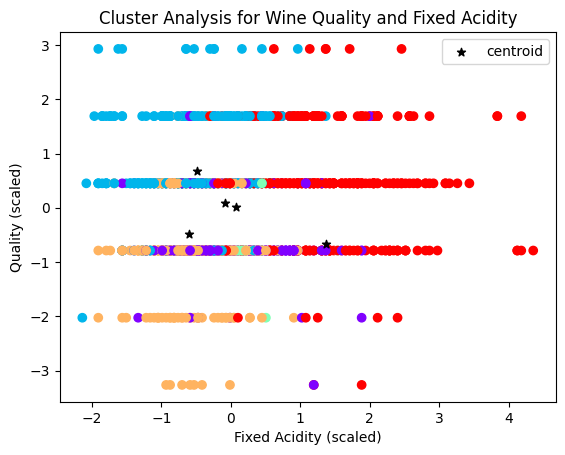

In [13]:
plt.scatter(rw_scaled["fixed acidity"], rw_scaled["quality"], c=y_pred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('Fixed Acidity (scaled)')
plt.ylabel('Quality (scaled)')
plt.title('Cluster Analysis for Wine Quality and Fixed Acidity')
plt.legend()
plt.show()

The plot above shows the clusters obtained from using the k-means algorithm on the red wine dataset.

It is apparent that the plot is difficult to read and interpret. Although wine quality is a numeric variable, it has only six unique values. As a result, I am going to group the data by clusters and examine which cluster has the highest mean Z-score for wine quality. Afterward, I will analyze the features in that cluster and identify those with relatively high Z-scores. This approach will enable me to understand which features tend to cluster with higher and lower qualities of wine.

In [14]:
 #Creating a new dataframe that groups by the mean of the clusters
rw_scaled_cluster = rw_scaled.groupby('cluster').mean()
rw_scaled_cluster.reset_index(inplace=True)
rw_scaled_cluster

rw_scaled_cluster.sort_values(by=['quality'], ascending=False)

,cluster,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,2,-0.599699,-0.485038,-0.108176,-0.221834,-0.380796,0.184010,-0.201640,-1.139002,0.528551,0.200265,1.215054,0.832554
4,5,1.367270,-0.674977,1.140048,0.198292,-0.014903,-0.538583,-0.523448,0.833230,-0.841194,0.330386,0.172104,0.402409
2,3,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
0,1,-0.078895,0.085668,0.098161,0.433196,0.037128,1.085767,1.381157,0.384663,-0.156750,-0.184107,-0.618165,-0.463049
3,4,-0.483685,0.675532,-0.791517,-0.231587,-0.078366,-0.401776,-0.384522,-0.095559,0.409664,-0.419668,-0.425757,-0.465275


### Anaylsis

The highest mean Z-scores for wine quality are in clusters 2 and 5, with values  of $0.833$ and $0.402$ respectively. This represents observations with higher values of wine quality. Clusters 1, 3, 4 have negative mean Z-scores for wine quality, indicating lower quality.

My method for determining which features cluster with higher qualities of wine was to see if a feature in both clusters 2 and 5 have a positive mean Z-score and if at least two out of the three features had negative mean Z-scores in  clusters 1, 3, and 4. For lower qualities of wine, I looked for the opposite trend.

There are only two features in both clusters that have positive mean Z-scores: alcohol and sulphates. Additionally, alcohol has negative mean Z-scores in clusters 1, 3, and 4. While sulphates have a very large mean Z-score in Cluster 3, they have negative values in Clusters 1 and 4, indicating that they also cluster with higher qualities of wine.

The wine's volatile acidity has negative mean Z-scores in clusters 2 and 5 and positive mean Z-scores for clusters 1, 3, and 4, indicating that it clusters best with lower qualities of wine. Other features such as the fixed acidity, chlorides, and total sulfur dioxide all had negative mean Z-scores in clusters 2 and 5 and had two positive mean Z-scores in clusters with lower qualities of wine. As a result, based on my criteria, they also cluster well with lower qualities of wine.

My analysis shows that if one wants to produce the highest quality of wine, the most important characteristics may be the wine's alcohol content and sulphate content. Additionally, minimizing the wine's volatile acidity is recommended.

----



# Question 2

Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [15]:
from scipy.spatial.distance import pdist, squareform #import methods from scipy
from scipy.cluster.hierarchy import linkage

#Dropping clusters column from Question 1
rw_scaled=rw_scaled.drop(columns=['cluster'])

row_clusters = linkage(pdist(rw_scaled, metric='euclidean'), method='complete') # define distance metric and linkage for model
row_clusters


array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.36000000e+02, 1.41000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.19100000e+03, 3.19200000e+03, 1.31143245e+01, 1.58100000e+03],
       [3.19300000e+03, 3.19400000e+03, 1.48474647e+01, 1.59700000e+03],
       [3.15800000e+03, 3.19500000e+03, 1.87246885e+01, 1.59900000e+03]])

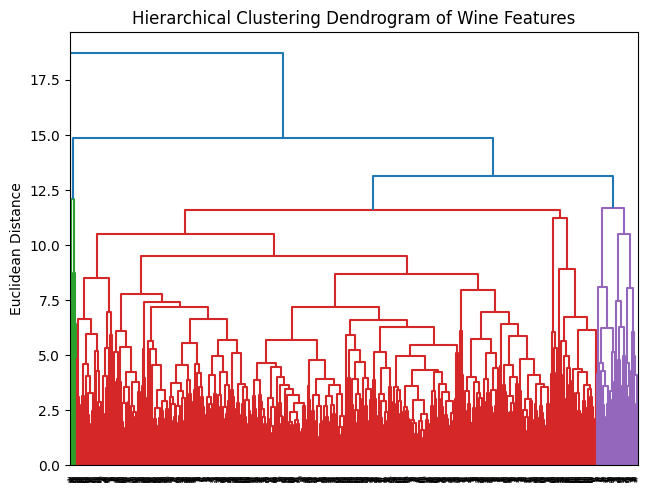

In [16]:
from scipy.cluster.hierarchy import dendrogram


row_dendr = dendrogram(row_clusters, labels=rw_scaled.index, leaf_font_size=2, leaf_rotation=90)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram of Wine Features')
plt.show()

The dendrogram above shows the grouping of observations based on their similarity. This dendrogram utilizes Euclidean distances, which is the square root of the sum of squared differences for each column. Lower values of Euclidean distance in the branches indicate higher degrees of similarity within each cluster. While dendrograms can be helpful for visualizing the similarity of datapoints within clusters, interpreting this particular dendrogram might be challenging. To address this, I have created a heatmap below in an attempt to identify regions with similar observations.



Text(0.5, 1.0, 'Hierarchical Clustering Heatmap of Wine Features and Observations')

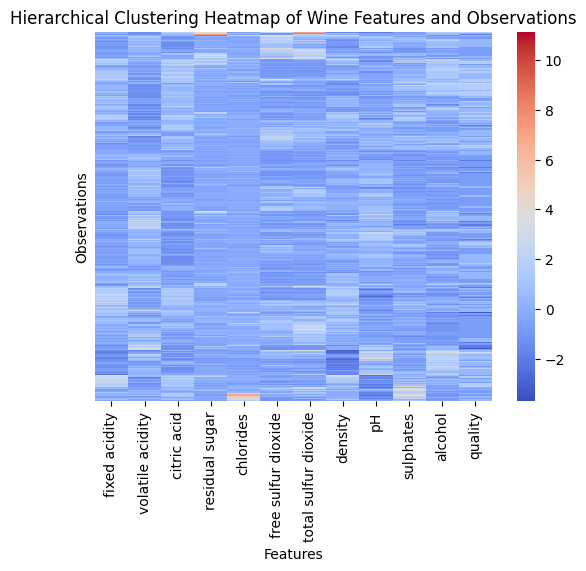

In [17]:
leaves = row_dendr['leaves']
rw_scaled_ordered = rw_scaled.iloc[leaves, :]

heatmap = sns.heatmap(rw_scaled_ordered, cmap='coolwarm', xticklabels=True, yticklabels=False)

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Hierarchical Clustering Heatmap of Wine Features and Observations')


The heatmap is more straightforward to interpret than the dendrogram. It provides a general sense of where the observations may differ. For instance, towards the bottom, variables such as chlorides, pH, and sulphates exhibit patches of dark blue or light red, diverging from the light blue color of the rest of the features. This indicates differences in their standardized values compared to the other features. Additionally, the colors of these aforementioned features differ from wine quality, suggesting varying values.

Similar to my K-means analysis, I will calculate the mean Z-score for each feature in the five clusters. This will allow me to better understand how the features cluster with wine quality.



In [18]:
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

labels = ac.fit_predict(rw_scaled)    # extract cluster labels for each observation in data
labels

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
rw_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823


In [20]:
rw_scaled['cluster'] = labels+1
rw_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823,2
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519,2
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519,2
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823,2


In [21]:
rw_scaled_cluster = rw_scaled.groupby('cluster').mean()
rw_scaled_cluster.reset_index(inplace=True)
rw_scaled_cluster

rw_scaled_cluster.sort_values(by=['quality'], ascending=False)

,cluster,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,5,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
0,1,1.117620,-0.349720,1.004432,-0.095057,1.470947,-0.269898,0.035390,0.800639,-1.292270,1.717645,-0.341875,0.114017
2,3,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
1,2,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170
3,4,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158


### Analysis

Unlike K-means, there are now three clusters with positive mean Z-scores for wine quality: clusters 1, 3, and 5. Additionally, there are only two clusters with negative mean Z-scores for wine quality, 2 and 4.

To determine which features cluster with higher qualities of wine, I checked if they have at least two out of three positive mean Z-scores in either clusters 1, 3, and 5 and negative mean Z-scores in both clusters 2 and 4. For lower qualities of wine, I looked for the opposite trend.

The only feature that meets my criteria is alcohol. Although it has a negative mean Z-score in cluster 3, it had positive values in clusters 1 and 5. Additionally, it has negative mean Z-scores in both clusters 2 and 4. Although residual sugar and citric acid have positive mean Z-scores in clusters 1, 3, and 5, they only have a negative value in cluster 2. While they may cluster with higher qualities of wine, it is unclear how they cluster with lower qualities of wine.


For lower qualities of wine, while free sulfur dioxide and total sulfur dioxide have positive mean Z-scores in clusters 2 and 4, they also have positive values in clusters 1 and 3. As a result, there may not be a discernible trend as to how these features cluster with wine quality.

According to my analysis using hierarchical clustering, alcohol content still may be an important feature for a high quality bottle of wine. However, it is unclear how one might need to optimize the features to produce a high quality bottle of wine.

---

# Question 3

Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [22]:
#Dropping the clusters column from the red wine dataframe, which was created using Hierarchal Clustering
rw_scaled = rw_scaled.drop(columns=['cluster'])
rw_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [23]:
#Fitting PCA model to scaled red wine dataframe
#I am going to use all columns to see how the first two components compare to other ten

pca=PCA()

#Creating PCA columns
columns = []
PC = "PC"

for i in range(1, 13):
    columns.append(PC + str(i))

#Fitting model
rw_pca = pd.DataFrame(pca.fit_transform(rw_scaled),
                           columns=columns,
                           index=rw_scaled.index)

rw_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
5,-1.742298,1.181661,-1.136057,-0.052679,0.040652,-1.045340,-0.042181,0.036445,-0.330368,0.037778,-0.368304,0.035948
6,-1.254988,1.144557,-0.772711,-0.377028,-1.042933,0.121079,-0.029092,-0.417097,0.141404,0.003870,-0.399813,0.109867
7,-2.057168,-1.016830,-0.607634,-0.103402,-0.415799,-0.079139,-1.024895,-1.703723,-0.585723,-0.004351,0.177678,0.360932
8,-0.925772,-0.649469,-1.015219,-0.135262,0.189705,-0.857411,-0.813084,-1.825588,-0.265366,0.189694,-0.129982,0.134221
9,0.529128,1.299502,1.704888,-0.794197,1.520393,-0.217105,0.888202,0.673060,1.317694,0.824990,-0.044220,0.020689


In [24]:
#Proportion of Explained Variance for each of the components
explained_variance_ratio = np.round(pca.explained_variance_ratio_,4)*100
explained_variance_ratio

array([26.01, 18.68, 14.02, 10.13,  8.11,  5.52,  5.15,  4.22,  3.43,
        2.73,  1.5 ,  0.5 ])

Text(0.5, 1.0, 'Principal Component Analysis: Proportion of Variance Explained')

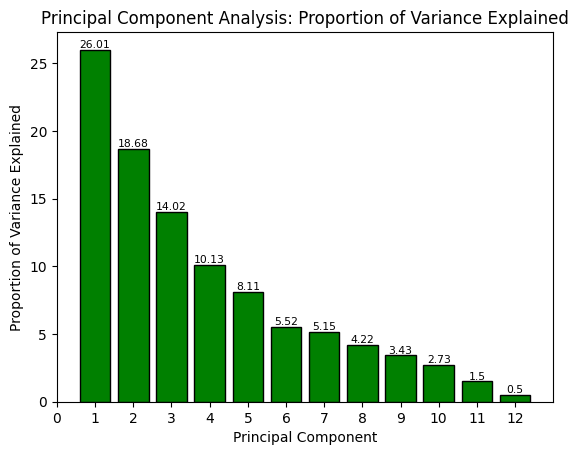

In [25]:
# Plot of the proportion of variance explained for each principal component
fig, ax = plt.subplots()
bars = ax.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='green', edgecolor='black', label='Explained Variance Ratio')

plt.bar_label(bars, fontsize=7.75) #Labelling the bars with the count of run number in each bin
plt.xticks(range(0,13,1))

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.title('Principal Component Analysis: Proportion of Variance Explained')


### Variance Analysis

The figure above shows a plot of the proportion of variance explained for each principal component. The first principal component explains $26.01\%$ of the variance, and the second principal component explains $18.68\%$ of the variance. The first two principal components explains $44.69\%$ of the variance.

### Supervised Machine Exercise

One way this could be used is to run a regression of the wine price on the first two principal components. That is, we are analyzing the relationship between the features with the most variation and wine price.

Just to demonstrate how we can use PCA as a way to conduct supervised machine learning, suppose that we had the price of wine data, and it was our target feature. That is, all features in the original dataset are our $X$, and our $y$ is the price. After conducting PCA on the X and reducing only using our two components, we can add back price data (note in the code below I create fictitious values of price data).

In [26]:
import random

'''
I am going to create 1599 random values between 400 and 500, which will be the prices of the wine
'''

random_state = 22
np.random.seed(random_state)

# Lower and Upper limits of the random values
lower_limit = 300
upper_limit = 600

# Creating list of 1,599 random values
wine_price = np.random.uniform(lower_limit, upper_limit, 1599).tolist()

print(wine_price)


[362.53816120765276, 444.50431852900977, 426.16141059431243, 557.7545995564033, 351.348466083502, 401.6591881811101, 381.15984998934937, 507.3124051348789, 366.1213549913177, 543.585276161606, 303.1580622948325, 468.3611089988999, 544.1178562245589, 523.5300888176507, 356.73340657816857, 301.8422599038295, 531.6131614333608, 587.3496504279826, 510.58136522829335, 389.2734800595151, 530.3978225866773, 506.46549746778425, 416.1550441143067, 484.56174752791685, 428.2665719533022, 475.2868929470685, 510.7906556596356, 333.568551565103, 576.9809777533351, 596.6658821589947, 503.223232046412, 538.5494326372959, 308.722904801427, 353.3277213107174, 562.4783235833152, 523.4796232105854, 452.42704896845146, 338.5001705483305, 445.2852715359326, 454.73204635485945, 393.37939902731534, 313.69846277963717, 431.30419802462984, 328.76538297541236, 313.5630335723081, 505.44861560013834, 554.7572235622738, 337.5621549580086, 338.71920216355085, 441.9180006226969, 359.26755274960175, 534.4868246480778,

In [27]:
rw_pca = rw_pca.iloc[:,:2]
rw_pca["Wine Price"] = wine_price
rw_pca

,PC1,PC2,Wine Price
0,-1.779442,1.157303,362.538161
1,-1.004185,2.071838,444.504319
2,-0.915783,1.393434,426.161411
3,2.404077,-0.213792,557.754600
4,-1.779442,1.157303,351.348466
...,...,...,...
1594,-2.241991,0.599594,410.997550
1595,-2.122456,-0.370101,412.547822
1596,-1.366265,-0.517561,569.578939
1597,-2.367147,0.703545,512.563863


In [28]:
X = rw_pca[["PC1", "PC2"]]
y = rw_pca["Wine Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
Linear Regression with PCA components and Wine Price Data
'''

lr = LinearRegression() #Creating Linear Regression object
lr.fit(X_train, y_train) #Fitting model with Linear Regression

#Finding finding the mean cross-validation score
lr_cv = np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring="r2"))

print("Mean cross-validation score for Linear Regression:", lr_cv)
print("Training score for Linear Regression: ", lr.score(X_train, y_train))
print("Test score for Linear Regression: ", lr.score(X_test, y_test))
print("")

lr_coefficents = lr.coef_
print("PC1", + lr_coefficents[0])
print("PC2", + lr_coefficents[1])

Mean cross-validation score for Linear Regression: -0.00908605796707842
Training score for Linear Regression:  0.00034413850810344204
Test score for Linear Regression:  -0.004591361457559007

PC1 0.8866026457292278
PC2 0.274812155806727


### Supervised Machine Learning Analysis

After running linear regression, both principal components show a positive relationship with wine price. However, the coefficient for $PC1$ is slightly over three times larger than the coefficient for $PC2$. This suggests that $PC1$ has a significantly greater influence on the wine price, indicating that the variation captured by $PC1$ has a stronger impact on the price of wine.

While it may be challenging to identify the features influencing this relationship, an analysis of the first two loading vectors provides insights. The loading vector data frame and plot reveal that the wine's fixed acidity, citric acid level, and density exhibit the largest values. Consequently, these features exert the most influence on the formation of $PC1$. This suggests that variations in these features may have the greatest impact on the price of wine.

Please note that while the magnitudes of the variables show the relationship between the principal components and the wine price, they do not show how well the model can generalize to unseen data. I accomplished this by finding the model's mean cross-validation score. I received a negative value, indicating this model does a very poor job at predicting new data. Nonetheless, I did this exercise to demonstrate how I can utilize a supervised machine learning model to extract information about how the variability of certain features can influence a target variable.



In [29]:
loading_vectors = pca.components_.T

columns = []
V = "V"

for i in range(1, 13):
    columns.append(V + str(i))

loading_vectors = pd.DataFrame(loading_vectors, columns=columns, index=rw_scaled.columns)
loading_vectors = loading_vectors.iloc[:,:2]
loading_vectors['Magnitude'] = np.sqrt(loading_vectors['V1']**2 + loading_vectors['V2']**2)

loading_vectors.head(10)

,V1,V2,Magnitude
fixed acidity,0.487883,-0.004173,0.487901
volatile acidity,-0.265129,0.338968,0.430340
citric acid,0.473335,-0.137358,0.492863
residual sugar,0.139154,0.167736,0.217944
chlorides,0.197427,0.189788,0.273856
free sulfur dioxide,-0.045881,0.259483,0.263508
total sulfur dioxide,0.004067,0.363971,0.363994
density,0.370301,0.330781,0.496527
pH,-0.432721,-0.065440,0.437641
sulphates,0.254535,-0.109334,0.277024


Text(0.5, 1.0, 'Loading Vectors for Wine Features')

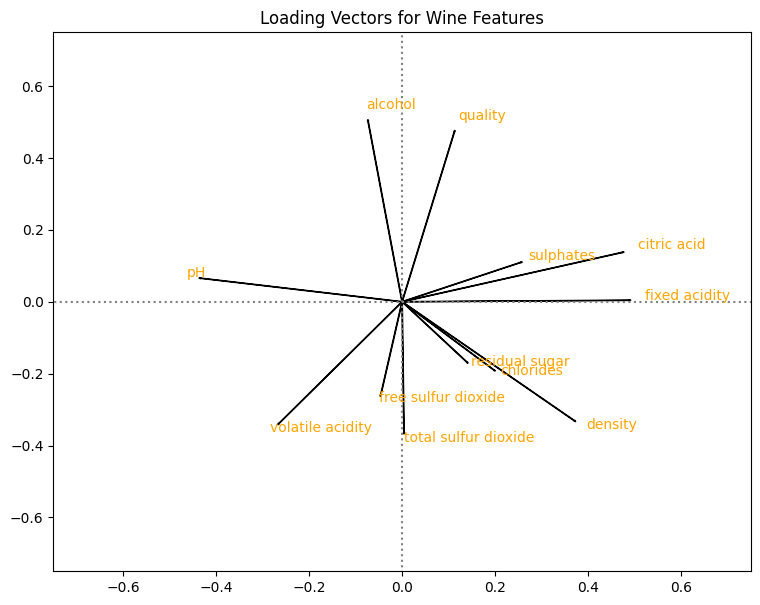

In [30]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-0.75,0.75)
ax1.set_ylim(-0.75,0.75)

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in loading_vectors[['V1', 'V2']].index:
    ax1.annotate(i, (loading_vectors.V1.loc[i]*a, -loading_vectors.V2.loc[i]*a), color='orange')

for i in range(0,12):
  ax1.arrow(0,0,loading_vectors.V1[i], -loading_vectors.V2[i])

ax1.set_title('Loading Vectors for Wine Features')
